In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv('dataset.csv')
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


***About the Data***
* 'encounter_id' : 'Unique identifier associated with a patient unit stay'
* 'patient_id': 'Unique identifier associated with a patient',
* 'hospital_id': 'Unique identifier associated with a hospital',
* 'age': 'The age of the patient on unit admission',
* 'bmi': 'The body mass index of the person on unit admission',
* 'elective_surgery':'Whether the patient was admitted to the hospital for an elective surgical operation',
* 'ethnicity':'The common national or cultural tradition which the person belongs to',
* 'gender':'Sex of the patient',
'height':'The height of the person on unit admission',
* 'icu_admit_source':'The location of the patient prior to being admitted to the unit',
* 'icu_id':' unique identifier for the unit to which the patient was admitted',
* 'icu_stay_type':'string',
* 'icu_type': 'A classification which indicates the type of care the unit is capable of providing',               
* 'pre_icu_los_days': 'The length of stay of the patient between hospital admission and unit admission',
* 'weight' :'The weight (body mass) of the person on unit admission',
* 'apache_2_diagnosis' :'The APACHE II diagnosis for the ICU admission',
* 'apache_3j_diagnosis' :'The APACHE III-J sub-diagnosis code which best describes the reason for the ICU admission',
* 'apache_post_operative':'The APACHE operative status; 1 for post-operative, 0 for non-operative',
* 'arf_apache':' Whether the patient had acute renal failure during the first 24 hours of their unit stay, defined as a 24 hour urine output <410ml, creatinine >=133 micromol/L and no chronic dialysis',
* 'gcs_eyes_apache':'The eye opening component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
* 'gcs_motor_apache': 'The motor component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
* 'gcs_unable_apache': 'Whether the Glasgow Coma Scale was unable to be assessed due to patient sedation',
* 'gcs_verbal_apache': 'The verbal component of the Glasgow Coma Scale measured during the first 24 hours which results in the highest APACHE III score',
* 'heart_rate_apache': 'The heart rate measured during the first 24 hours which results in the highest APACHE III score',
* 'intubated_apache': 'Whether the patient was intubated at the time of the highest scoring arterial blood gas used in the oxygenation score',
* 'map_apache': 'The mean arterial pressure measured during the first 24 hours which results in the highest APACHE III score',
* 'resprate_apache': 'The respiratory rate measured during the first 24 hours which results in the highest APACHE III score',
* 'temp_apache': 'The temperature measured during the first 24 hours which results in the highest APACHE III score',
* 'ventilated_apache': 'Whether the patient was invasively ventilated at the time of the highest scoring arterial blood gas using the oxygenation scoring algorithm, including any mode of positive pressure ventilation delivered through a circuit attached to an endo-tracheal tube or tracheostomy',      
* 'd1_diasbp_max':"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
* 'd1_diasbp_min':"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
* 'd1_diasbp_noninvasive_max':"The patient's highest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",
* 'd1_diasbp_noninvasive_min':"The patient's lowest diastolic blood pressure during the first 24 hours of their unit stay, non-invasively measured",
* 'd1_heartrate_max':"The patient's highest heart rate during the first 24 hours of their unit stay",
* 'd1_heartrate_min':"The patient's lowest heart rate during the first 24 hours of their unit stay",
* 'd1_mbp_max':"The patient's highest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
* 'd1_mbp_min':"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, either non-invasively or invasively measured",
* 'd1_mbp_noninvasive_max':"The patient's highest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured",
* 'd1_mbp_noninvasive_min':"The patient's lowest mean blood pressure during the first 24 hours of their unit stay, non-invasively measured",
* 'd1_resprate_max':"The patient's highest respiratory rate during the first 24 hours of their unit stay",
* 'd1_resprate_min':"The patient's lowest respiratory rate during the first 24 hours of their unit stay",
* 'd1_spo2_max':"The patient's highest peripheral oxygen saturation during the first 24 hours of their unit stay",
* 'd1_spo2_min':"The patient's lowest peripheral oxygen saturation during the first 24 hours of their unit stay",
* 'd1_sysbp_max':"The patient's highest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured",
* 'd1_sysbp_min':"The patient's lowest systolic blood pressure :uring the first 24 hours of their unit stay, either non-invasively or invasively measured",
* 'd1_sysbp_noninvasive_max':"The patient': highest systolic blood pressure during the first 24 hours of their unit stay, invasively measured",
* 'd1_sysbp_noninvasive_min':"The patient': lowest systolic blood pressure during the first 24 hours of their unit stay, invasively measured",
* 'd1_temp_max':"The patient:s highest core temperature during the first 24 hours of their unit stay, invasively measured",
* 'd1_temp_min':"The patient's lowest core temperature during the first 24 hours of their unit stay",
* 'h1_diasbp_max':"The patient's highest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
* 'h1_diasbp_min':"The patient's lowest diastolic blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
* 'h1_diasbp_noninvasive_max':"The patient:s highest diastolic blood pressure during the first hour of their unit stay, invasively measured",
* 'h1_diasbp_noninvasive_min':"The patient:s lowest diastolic blood pressure during the first hour of their unit stay, invasively measured",
* 'h1_heartrate_max':"The patient's highest heart rate during the first hour of their unit stay",
* 'h1_heartrate_min':"The patient's lowest heart rate during the first hour of their unit stay",
* 'h1_mbp_max':"The patient's highest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
* 'h1_mbp_min':"The patient's lowest mean blood :ressure during the first hour of their unit stay, either non-invasively or invasively measured",
* 'h1_mbp_noninvasive_max':"The patient's :ighest mean blood pressure during the first hour of their unit stay, non-invasively measured",
* 'h1_mbp_noninvasive_min':"The patient's :owest mean blood pressure during the first hour of their unit stay, non-invasively measured",
* 'h1_resprate_max':"The patient's highest respiratory rate during the first hour of their unit stay",
* 'h1_resprate_min':"The patient's lowest respiratory rate during the first hour of their unit stay",
* 'h1_spo2_max':"The patient's highest peripheral oxygen saturation during the first hour of their unit stay",
* 'h1_spo2_min':"The patient's lowest peripheral oxygen saturation during the first hour of their unit stay",
* 'h1_sysbp_max':"The patient's highest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
* 'h1_sysbp_min':"The patient's lowest systolic blood pressure during the first hour of their unit stay, either non-invasively or invasively measured",
* 'h1_sysbp_noninvasive_max':"The patient's highest systolic blood pressure during the first hour of their unit stay, non-invasively measured",
* 'h1_sysbp_noninvasive_min':"The patient's lowest systolic blood pressure during the first hour of their unit stay, non-invasively measured",
* 'd1_glucose_max':"The highest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay",
* 'd1_glucose_min':"The lowest glucose concentration of the patient in their serum or plasma during the first 24 hours of their unit stay",
* 'd1_potassium_max':"The highest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay",
* 'd1_potassium_min':"The lowest potassium concentration for the patient in their serum or plasma during the first 24 hours of their unit stay",
* 'apache_4a_hospital_death_prob':"The APACHE IVa probabilistic prediction of in-hospital mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis.",
* 'apache_4a_icu_death_prob':"The APACHE IVa probabilistic prediction of in ICU mortality for the patient which utilizes the APACHE III score and other covariates, including diagnosis",
* 'aids':"Whether the patient has a definitive diagnosis of acquired immune deficiency syndrome (AIDS) (not HIV positive alone)",
* 'cirrhosis':"Whether the patient has a history of heavy alcohol use with portal hypertension and varices, other causes of cirrhosis with evidence of portal hypertension and varices, or biopsy proven cirrhosis. This comorbidity does not apply to patients with a functioning liver transplant.",
* 'diabetes_mellitus':"Whether the patient has been diagnosed with diabetes, either juvenile or adult onset, which requires medication.",
* 'hepatic_failure':"Whether the patient has cirrhosis and additional complications including jaundice and ascites, upper GI bleeding, hepatic encephalopathy, or coma.",
* 'immunosuppression':"Whether the patient has their immune system suppressed within six months prior to ICU admission for any of the following reasons; radiation therapy, chemotherapy, use of non-cytotoxic immunosuppressive drugs, high dose steroids (at least 0.3 mg/kg/day of methylprednisolone or equivalent for at least 6 months).",
* 'leukemia':"Whether the patient has been diagnosed with acute or chronic myelogenous leukemia, acute or chronic lymphocytic leukemia, or multiple myeloma.",
* 'lymphoma':"Whether the patient has been diagnosed with non-Hodgkin lymphoma.",
'solid_tumor_with_metastasis':"Whether the patient has been diagnosed with any solid tumor carcinoma (including malignant melanoma) which has evidence of metastasis.",
* 'apache_3j_bodysystem':"Admission diagnosis group for APACHE III",
* 'apache_2_bodysystem':"Admission diagnosis group for APACHE II",
* 'hospital_death':"Whether the patient died during this hospitalization"


**Data Describe**

In [ ]:
data.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Drop "Unnamed column"

In [ ]:
data.drop('Unnamed: 83',axis=1,inplace=True)
data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0


In [ ]:
# Total Missing Data
total = data.isnull().sum().sort_values(ascending=False)
# Missing Data percentage
pct = total/len(data.index) * 100
# Display in table form
missing = pd.concat([pct, total], axis=1, keys=['Percentage Missing (%)', 'Total Missing Data'])
missing


,Percentage Missing (%),Total Missing Data
d1_potassium_max,10.451081,9585
d1_potassium_min,10.451081,9585
h1_mbp_noninvasive_max,9.904812,9084
h1_mbp_noninvasive_min,9.904812,9084
apache_4a_icu_death_prob,8.665075,7947
...,...,...
icu_stay_type,0.000000,0
icu_id,0.000000,0
elective_surgery,0.000000,0
hospital_id,0.000000,0


# DATA PREPROCESSING

**Data Imputation** (Dealing with missing value)

***age*** : Percentage missing = 4.61%

Impute the missing values with mean


In [ ]:
data['age'] = data['age'].fillna(data['age'].mean())

***height*** : Percentage missing = 1.45%

Impute the missing values with mean

In [ ]:
data['height'] = data['height'].fillna(data['height'].mean())

***weight*** : Percentage missing = 2.97%

Impute the missing values with mean

In [ ]:
data['weight'] = data['weight'].fillna(data['weight'].mean())

***bmi*** : Percentage missing = 3.74%

Impute by recalculation

In [ ]:
# Assuming 'data' is your variable containing the dataset
empty_bmi = data['bmi'].isnull()
# Assuming 'data' is your variable containing the dataset
data.loc[empty_bmi, 'bmi'] = data.loc[empty_bmi, 'weight'] / ((data.loc[empty_bmi, 'height'] / 100) ** 2)

***pre_icu_los_days*** : Filter negative data

In [ ]:
negative_mask = data['pre_icu_los_days'] < 0
filtered_data = data[negative_mask]

# Replace negative values with NaN
data.loc[negative_mask, 'pre_icu_los_days'] = np.nan

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Impute the missing values
data['pre_icu_los_days'] = imputer.fit_transform(data[['pre_icu_los_days']])

***apache_4a_hospital_death_prob & apache_4a_icu_death_prob*** : Filter negative data

In [ ]:
# Filter the DataFrame based on the condition
data_filtered = data[(data['apache_4a_hospital_death_prob'] >= 0) & (data['apache_4a_icu_death_prob'] >= 0)]

# Check the number of rows before and after filtering
print("Number of rows before filtering:", len(data))
print("Number of rows after filtering:", len(data_filtered))

# Update the original DataFrame by assigning the filtered DataFrame
data = data_filtered

Number of rows before filtering: 91713
Number of rows after filtering: 81074


**Dropping Columns**


*   encounter_id
*   hospital_id
*   icu_admit_source
*   ethnicity
*   icu_stay_type
*   icu_id



In [ ]:
data.drop(
    labels = ["encounter_id","patient_id", "hospital_id", "icu_admit_source", "ethnicity", "icu_stay_type", "icu_id"],
    axis = 1,
    inplace = True
)
# Drop empty columns
data.dropna(axis=1, how='all', inplace=True)
data.dropna(inplace=True)
data = data.reset_index(drop=True)

<ipython-input-20-e6de23fe6e38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(
<ipython-input-20-e6de23fe6e38>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(axis=1, how='all', inplace=True)
<ipython-input-20-e6de23fe6e38>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


***apache2_diagnosis & apache3j_diagnosis***: Min-Max Scaling

In [ ]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Extract the 'apache_2_diagnosis' & 'apache_3j_diagnosis' columns
apache2_diagnosis = data['apache_2_diagnosis']
apache3j_diagnosis = data['apache_3j_diagnosis']

# Calculate the minimum and maximum values of the 'apache_2_diagnosis' & 'apache_3j_diagnosis' columns
min_value2 = apache2_diagnosis.min()
max_value2 = apache2_diagnosis.max()
min_value3 = apache3j_diagnosis.min()
max_value3 = apache3j_diagnosis.max()

# Perform Min-Max normalization for apache2 to fit in between range 0 - 71 for 'apache_2_diagnosis' & range 0 - 299 'apache_3j_diagnosis'
normalized_apache2_diagnosis = (apache2_diagnosis - min_value2) / (max_value2 - min_value2) * 71
normalized_apache3j_diagnosis = (apache3j_diagnosis - min_value3) / (max_value3 - min_value3) * 299

# Replace the 'apache_2_diagnosis' column with the normalized values
data['apache_2_diagnosis'] = normalized_apache2_diagnosis
data['apache_3j_diagnosis'] = normalized_apache3j_diagnosis

**Label Encoder** : Use to standardize the categorical data into numerical form

In [ ]:
# checking features
columns = data.select_dtypes(include='O').keys()
# display variabels
print(columns)

# Create a dictionary to store the encoders
encoders = {}

# Apply label encoding to each column
for column in columns:
  encoder = LabelEncoder()
  data[column] = encoder.fit_transform(data[column])
  encoders[column] = encoder


Index(['gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem'], dtype='object')


Display the features that have been converted:

In [ ]:
data[['gender', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']]

,gender,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,1,2,9,0
1,0,5,8,6
2,1,5,7,4
3,1,5,9,0
4,1,0,0,0
...,...,...,...,...
60646,1,5,1,1
60647,1,5,0,0
60648,1,3,9,0
60649,0,5,9,0


# EXPLORATORY DATA ANALYSIS (EDA)

**Feature Importance**

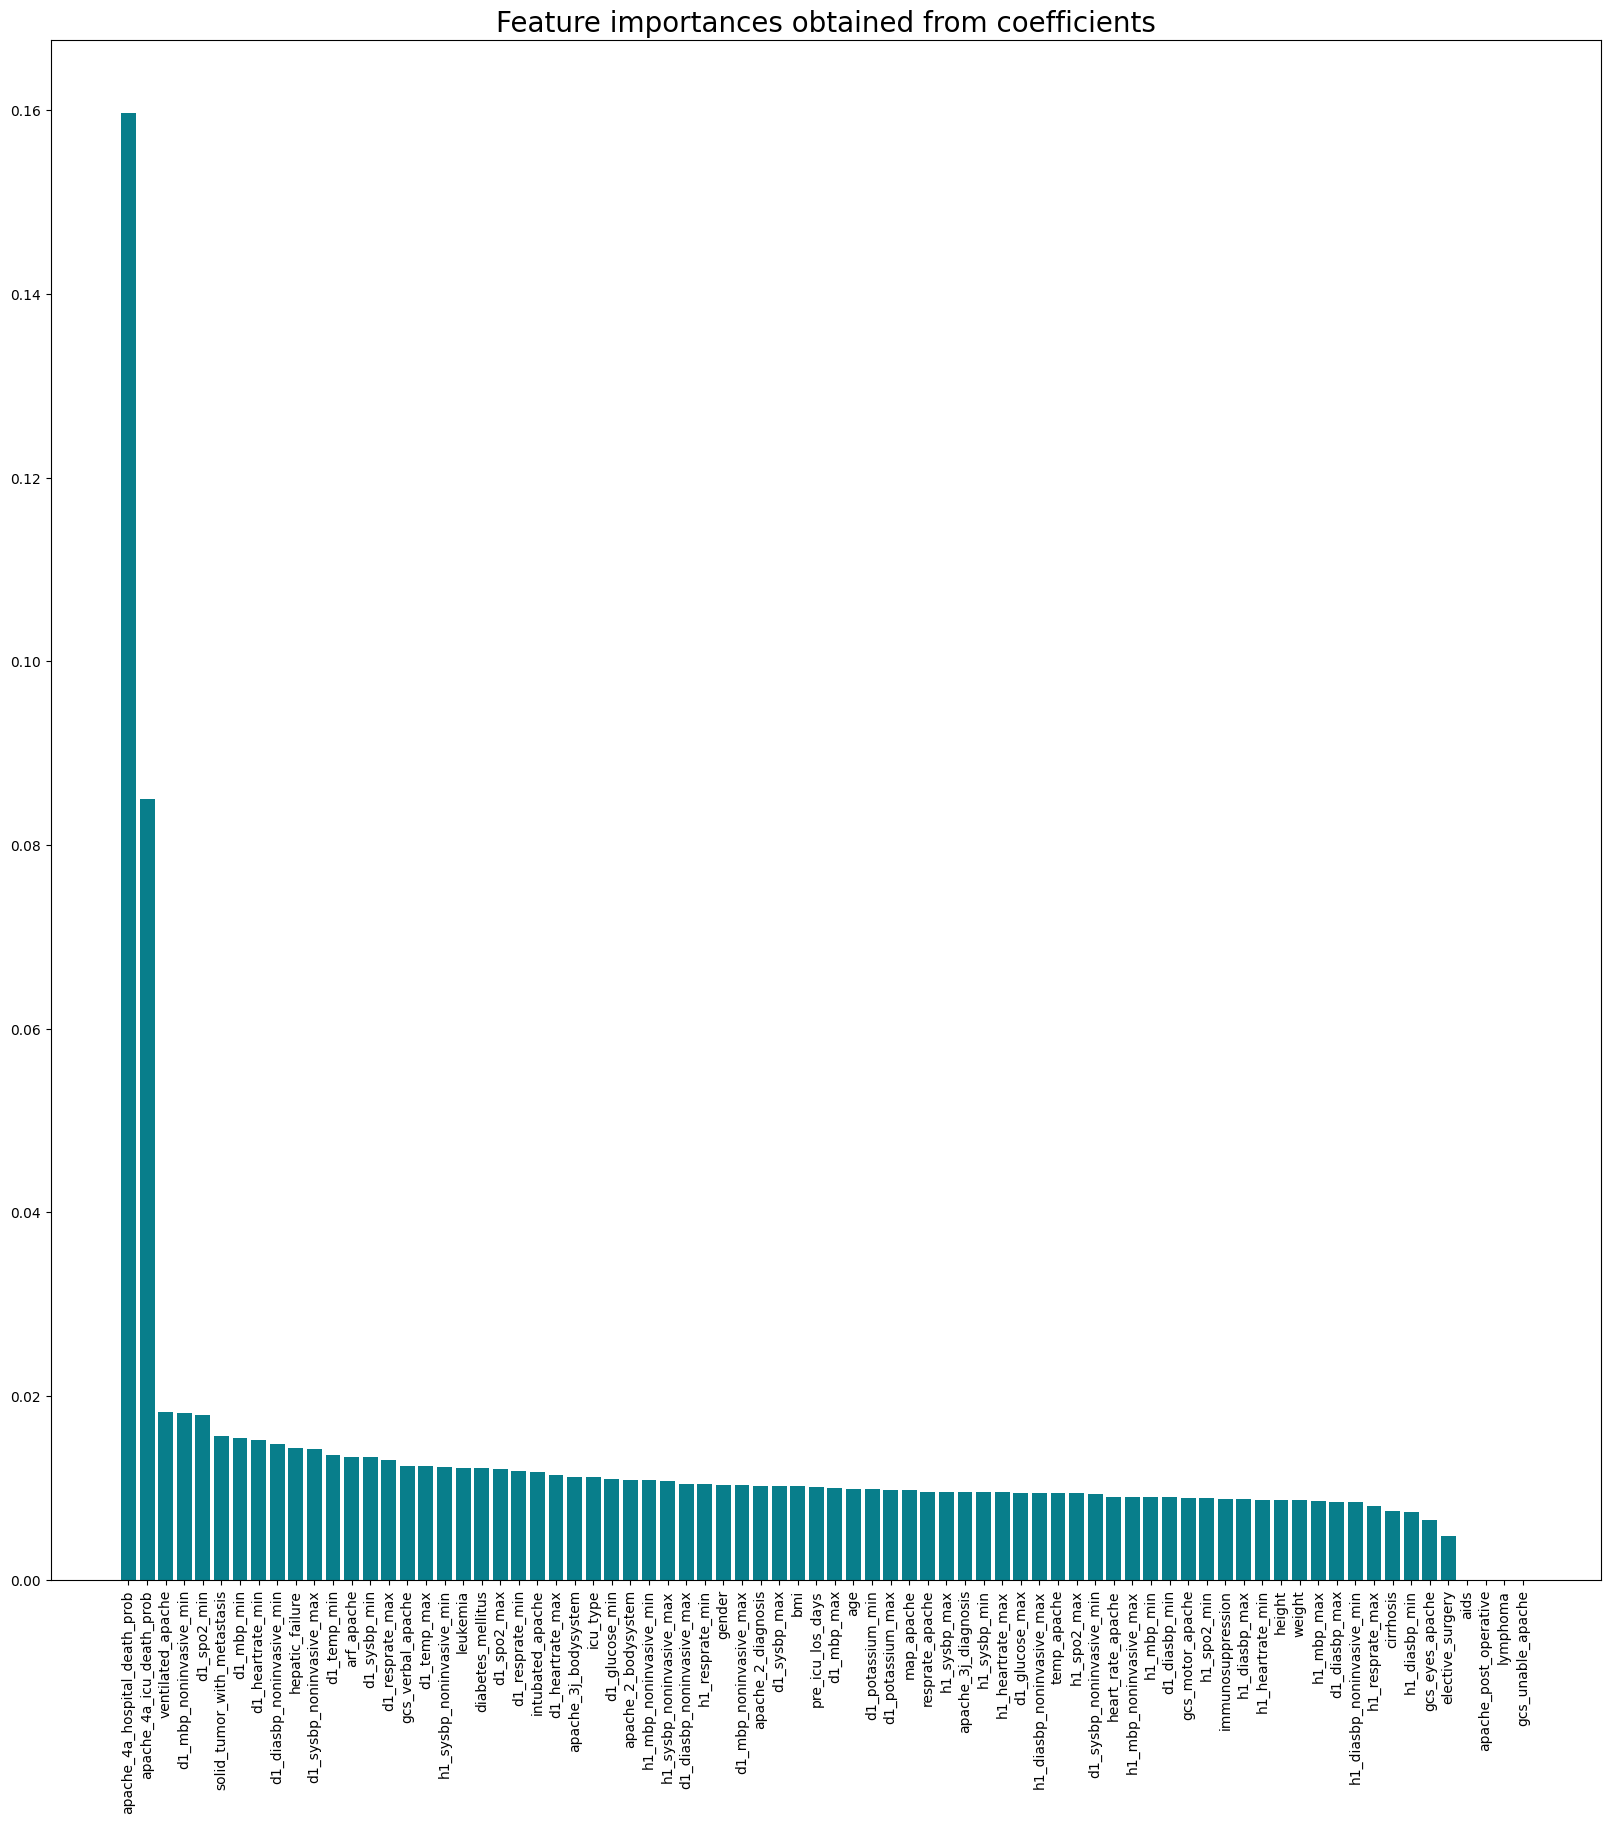

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(data.drop('hospital_death', axis = 1), data['hospital_death'])
importances = pd.DataFrame(data={
    'Attribute': data.drop('hospital_death', axis = 1).columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(20, 20))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Dropping Columns**


*   'apache_post_operative'
*   'aids'
*   'gcs_unable_apache'
*   'lymphoma'

Since these features
 have the importance level of 0.00



In [ ]:
data.drop(
    labels = ["apache_post_operative", "aids", "gcs_unable_apache", "lymphoma"],
    axis = 1,
    inplace = True
)

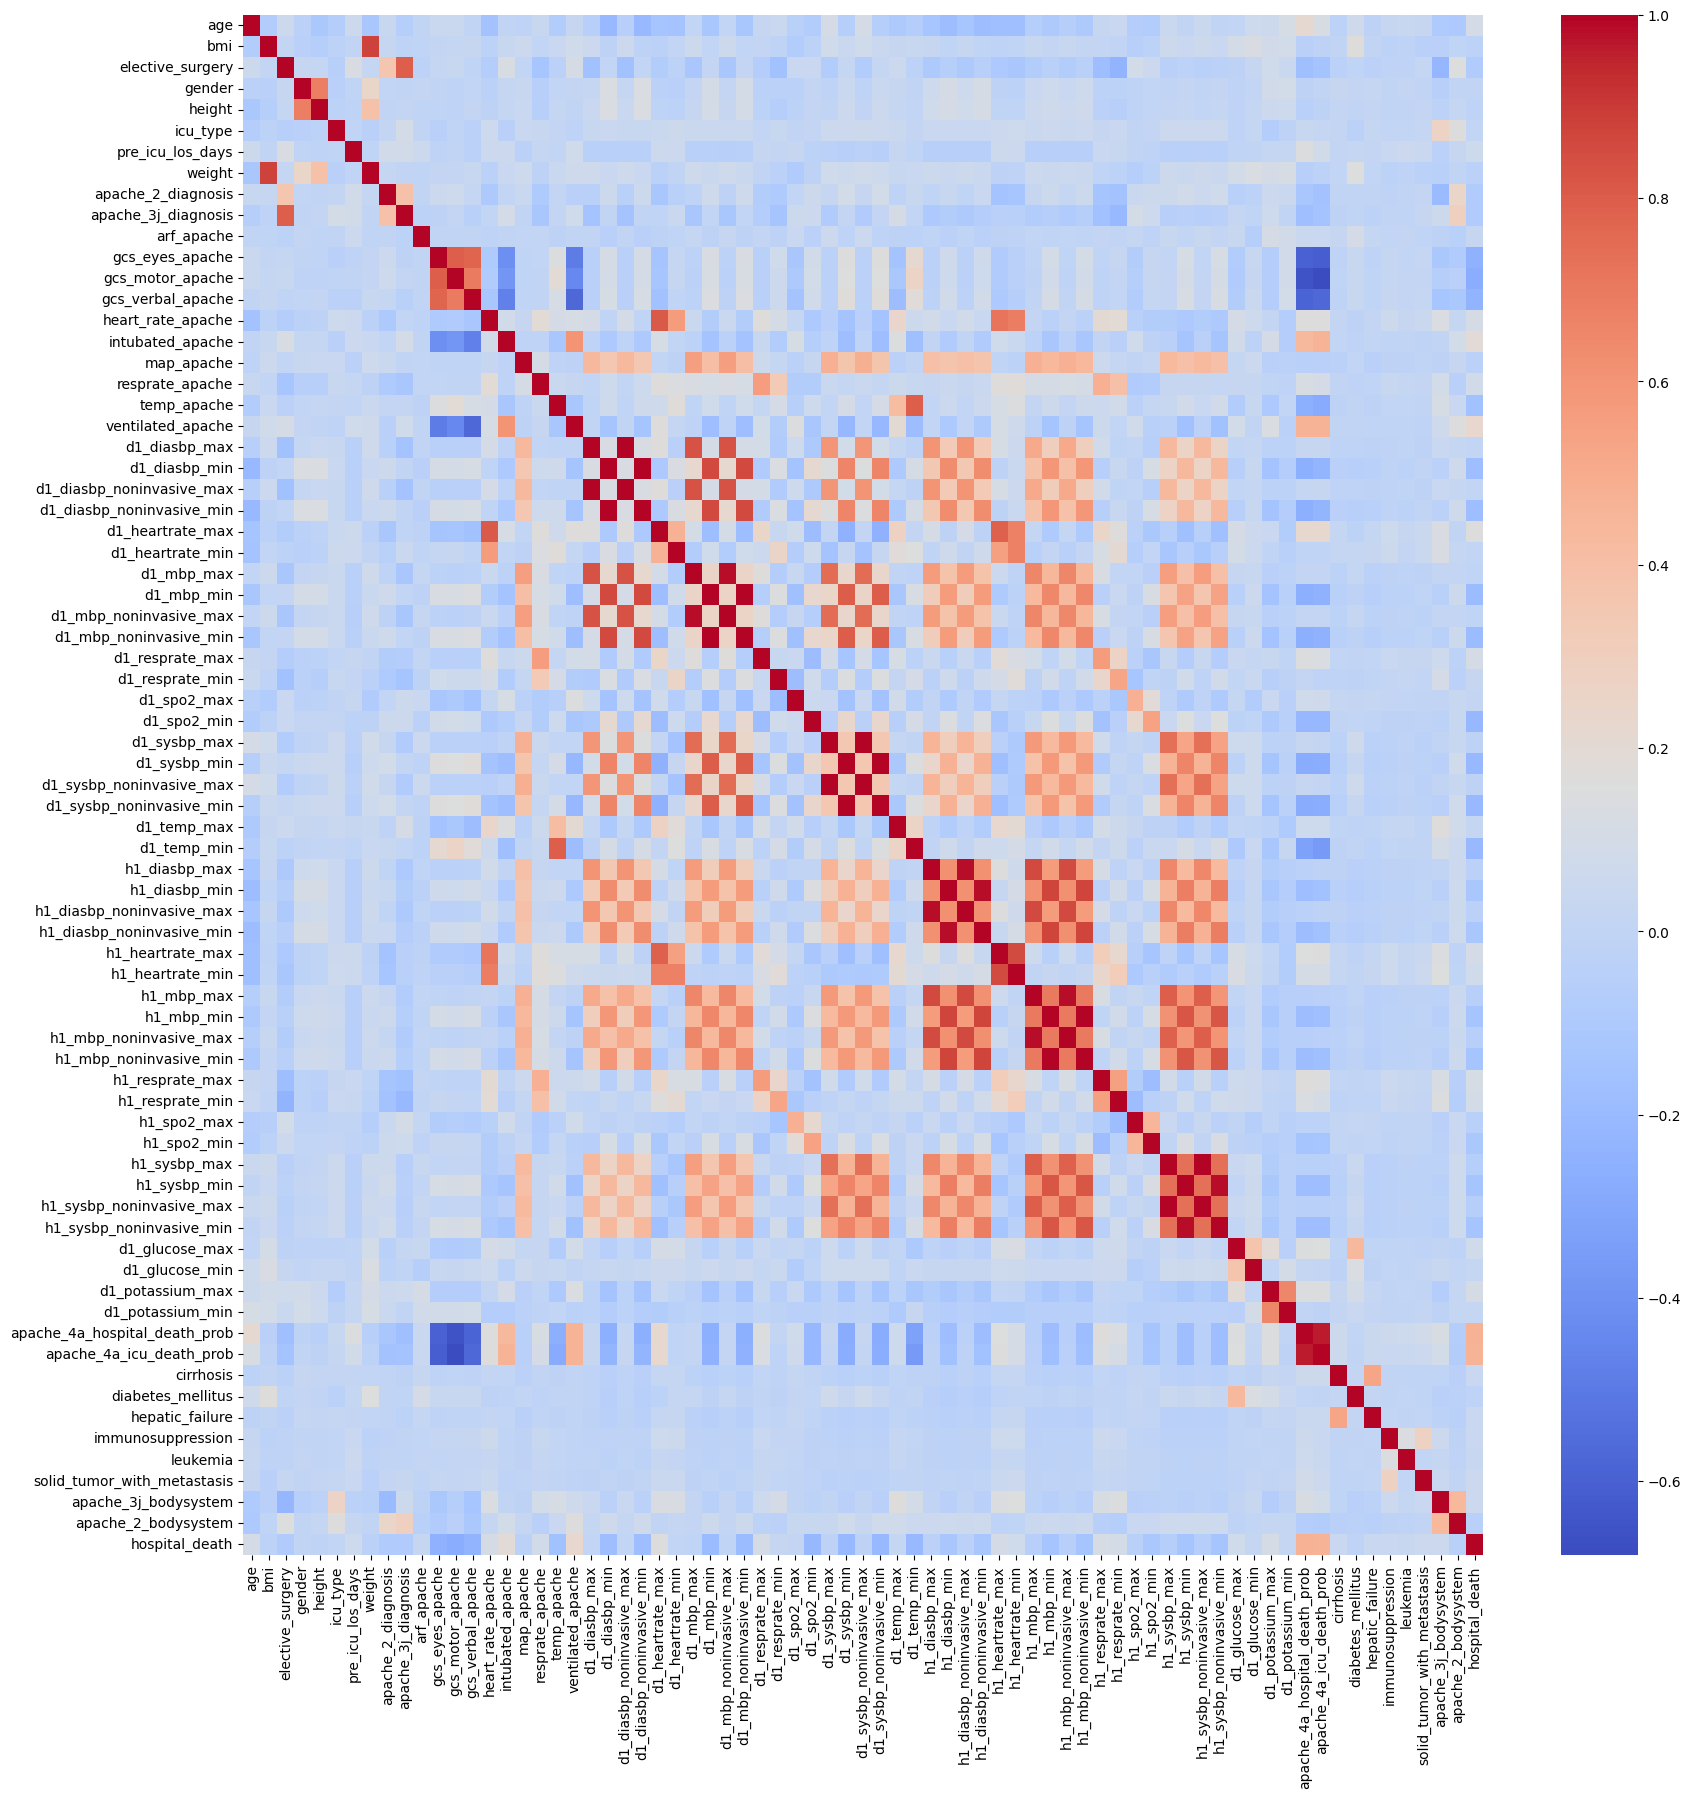

In [ ]:
plt.figure(figsize=(20,20))
_=sns.heatmap(data.corr(),cmap='coolwarm')

APACHE_4A_HOSPITAL_DEATH_PROB

0    0.10
1    0.47
2    0.05
3    0.11
4    0.02
Name: apache_4a_hospital_death_prob, dtype: float64

Number of Null values:
0

Value Counts:
0.01    7244
0.02    6879
0.03    5373
0.04    4408
0.05    3646
        ... 
0.93      27
0.96      20
0.95      16
0.97       5
0.98       3
Name: apache_4a_hospital_death_prob, Length: 99, dtype: int64

count    60651.000000
mean         0.126772
std          0.170671
min          0.000000
25%          0.020000
50%          0.060000
75%          0.150000
max          0.980000
Name: apache_4a_hospital_death_prob, dtype: float64



<ipython-input-27-fba6b903d833>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][data['hospital_death'] == 0], color='g', label='Survive', hist_kws={'edgecolor': 'black'})
<ipython-input-27-fba6b903d833>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(data[i][data['hospital_death'

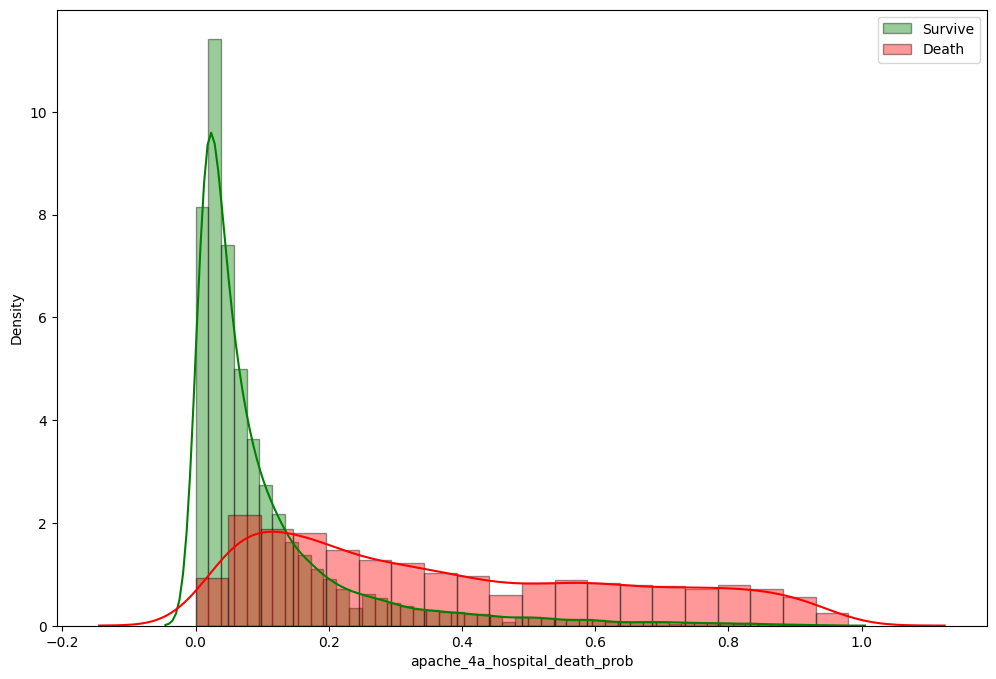

APACHE_4A_ICU_DEATH_PROB

0    0.05
1    0.29
2    0.02
3    0.06
4    0.01
Name: apache_4a_icu_death_prob, dtype: float64

Number of Null values:
0

Value Counts:
0.01    14603
0.02     8755
0.00     6013
0.03     5658
0.04     4000
        ...  
0.94        8
0.92        7
0.95        6
0.97        2
0.96        2
Name: apache_4a_icu_death_prob, Length: 98, dtype: int64

count    60651.000000
mean         0.077969
std          0.137952
min          0.000000
25%          0.010000
50%          0.030000
75%          0.070000
max          0.970000
Name: apache_4a_icu_death_prob, dtype: float64



<ipython-input-27-fba6b903d833>:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[i][data['hospital_death'] == 0], color='g', label='Survive', hist_kws={'edgecolor': 'black'})
<ipython-input-27-fba6b903d833>:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ = sns.distplot(data[i][data['hospital_death'

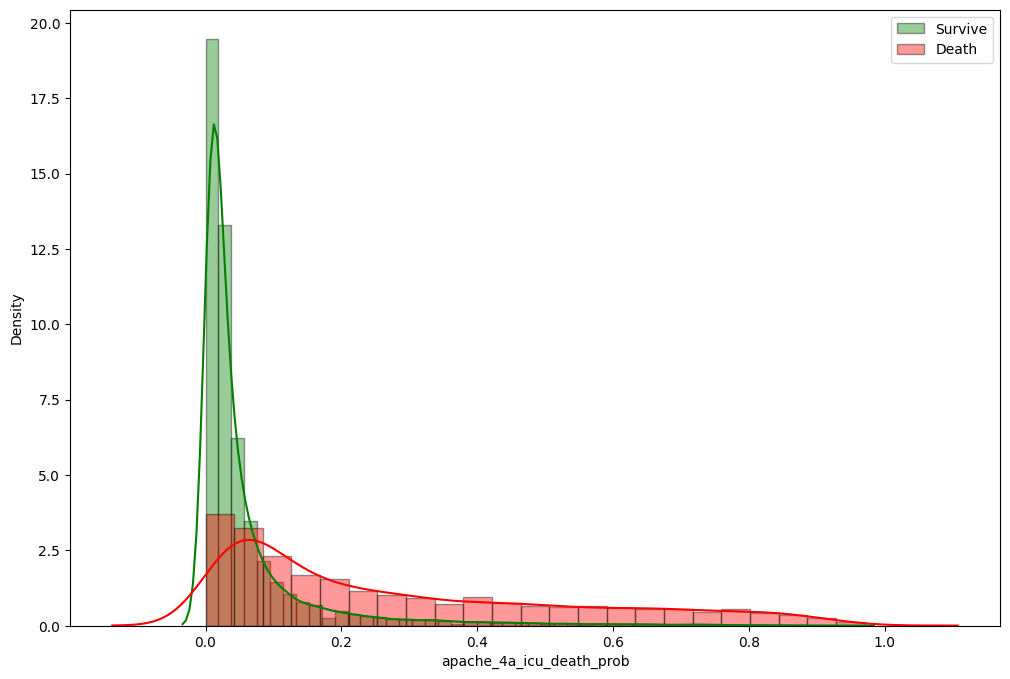

In [ ]:
cat_col = []
num_col = []

selected_features = ["apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]

for i in selected_features:
    print(i.upper())
    print('')
    print(data[i].head(5))
    print('')
    print('Number of Null values:')
    print(data[i].isnull().sum())
    print('')
    print('Value Counts:')
    print(data[i].value_counts())
    print('')
    print(data[i].describe(include='all'))
    print('')

    if data[i].value_counts().shape[0] > 20:
        plt.figure(figsize=(12, 8))
        sns.distplot(data[i][data['hospital_death'] == 0], color='g', label='Survive', hist_kws={'edgecolor': 'black'})
        _ = sns.distplot(data[i][data['hospital_death'] == 1], color='r', label='Death', hist_kws={'edgecolor': 'black'})
        plt.legend()
        plt.show()
        num_col.append(i)
    else:
        plt.figure(figsize=(14, 6))
        sns.countplot(x=i, hue="hospital_death", data=data, palette='coolwarm')
        plt.legend(loc='upper right')
        plt.yscale('log')
        plt.xticks(rotation=45)
        plt.show()

        if data[i].dtype != np.object:
            num_col.append(i)
        else:
            cat_col.append(i)


# MODEL DEVELOPMENT

Split The dataset into Training, Validation and Testing

In [ ]:
y = data['hospital_death']
X = data.drop('hospital_death', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print(X_train.shape, X_valid.shape, X_test.shape);
print(y_train.shape, y_valid.shape, y_test.shape);

(48520, 72) (6066, 72) (6065, 72)
(48520,) (6066,) (6065,)


Scale the features using StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2
from tensorflow.keras.layers import Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# %matplotlib inline
from matplotlib import pyplot
from numpy import where

In [ ]:
# Define the number of input features
input_dim = len(X. columns)

# Define the network architectures
models = []
model_accuracy = []

data.head()

,age,bmi,elective_surgery,gender,height,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,...,apache_4a_icu_death_prob,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.0,22.730000,0,1,180.3,2,0.541667,73.90000,4.115942,57.093674,...,0.05,0.0,1.0,0.0,0.0,0.0,0.0,9,0,0
1,77.0,27.420000,0,0,160.0,5,0.927778,70.20000,2.400966,14.522581,...,0.29,0.0,1.0,0.0,0.0,0.0,0.0,8,6,0
2,67.0,27.560000,0,1,190.5,5,0.000694,100.00000,68.599034,42.998229,...,0.02,0.0,1.0,0.0,0.0,0.0,0.0,7,4,0
3,70.0,30.864404,0,1,165.0,5,0.002083,84.02834,4.115942,56.956991,...,0.06,0.0,0.0,0.0,1.0,0.0,0.0,9,0,0
4,50.0,25.710000,0,1,175.3,0,0.060417,79.00000,3.772947,0.854269,...,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [ ]:
# Model1 : Multiple Hidden Layers and Same Activation Functions (sigmoid)
model1 = Sequential()
model1.add(Dense(64, activation='sigmoid', input_dim=input_dim, kernel_regularizer=l1(0.01)))
model1.add(Dense(32, activation='sigmoid', kernel_regularizer=l2(0.01)))
model1.add(Dense(16, activation='sigmoid',kernel_regularizer=l1(0.01)))
model1.add(Dense(8, activation='sigmoid', kernel_regularizer=l2(0.01)))
model1.add(Dense(4, activation='sigmoid',kernel_regularizer=l1(0.01)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Declare early_stopping to stop the evaluation when result is same
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

history1 = model1.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_valid_scaled, y_valid),callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_train_scaled, y_train)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

models.append('model1')
model_accuracy.append(accuracy)

Epoch 1/20
1517/1517 [==============================] - 3s 2ms/step - loss: 0.7002 - accuracy: 0.9115 - val_loss: 0.3144 - val_accuracy: 0.9077
Epoch 2/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.3058 - accuracy: 0.9115 - val_loss: 0.3149 - val_accuracy: 0.9077
Epoch 3/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.3058 - accuracy: 0.9115 - val_loss: 0.3144 - val_accuracy: 0.9077
Epoch 4/20
1517/1517 [==============================] - 3s 2ms/step - loss: 0.3058 - accuracy: 0.9115 - val_loss: 0.3145 - val_accuracy: 0.9077
Epoch 5/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.3058 - accuracy: 0.9115 - val_loss: 0.3144 - val_accuracy: 0.9077
Epoch 6/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.3058 - accuracy: 0.9115 - val_loss: 0.3146 - val_accuracy: 0.9077
Epoch 7/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.3057 - accuracy: 0.9115 - val_loss: 0.3145 - val_accuracy:

In [ ]:
# Model2 : Multiple Hidden Layers and Same Activation Functions (relu)
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_dim=input_dim, kernel_regularizer=l1(0.01)))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(16, activation='relu', kernel_regularizer=l1(0.01)))
model2.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(4, activation='relu', kernel_regularizer=l1(0.01)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Declare early_stopping to stop the evaluation when result is same
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

history2 = model2.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_valid_scaled, y_valid),callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model2.evaluate(X_train_scaled, y_train)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

models.append('model2')
model_accuracy.append(accuracy)

Epoch 1/20
1517/1517 [==============================] - 3s 2ms/step - loss: 0.7633 - accuracy: 0.9109 - val_loss: 0.3389 - val_accuracy: 0.9077
Epoch 2/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.3167 - accuracy: 0.9149 - val_loss: 0.3206 - val_accuracy: 0.9172
Epoch 3/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.3049 - accuracy: 0.9210 - val_loss: 0.3119 - val_accuracy: 0.9169
Epoch 4/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.2983 - accuracy: 0.9217 - val_loss: 0.3092 - val_accuracy: 0.9176
Epoch 5/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.2921 - accuracy: 0.9217 - val_loss: 0.2995 - val_accuracy: 0.9174
Epoch 6/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.2885 - accuracy: 0.9210 - val_loss: 0.2956 - val_accuracy: 0.9167
Epoch 7/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.2853 - accuracy: 0.9213 - val_loss: 0.2946 - val_accuracy:

In [ ]:
# Model3 : Multiple Hidden Layers and Same Activation Functions (tanh)
model3 = Sequential()
model3.add(Dense(64, activation='tanh', input_dim=input_dim, kernel_regularizer=l1(0.01)))
model3.add(Dense(32, activation='tanh', kernel_regularizer=l2(0.01)))
model3.add(Dense(16, activation='tanh', kernel_regularizer=l1(0.01)))
model3.add(Dense(8, activation='tanh', kernel_regularizer=l2(0.01)))
model3.add(Dense(4, activation='tanh', kernel_regularizer=l1(0.01)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Declare early_stopping to stop the evaluation when result is same
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

history3 = model3.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_valid_scaled, y_valid),callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model3.evaluate(X_train_scaled, y_train)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

models.append('model3')
model_accuracy.append(accuracy)


Epoch 1/20
1517/1517 [==============================] - 3s 2ms/step - loss: 0.7595 - accuracy: 0.9124 - val_loss: 0.3330 - val_accuracy: 0.9146
Epoch 2/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.3102 - accuracy: 0.9156 - val_loss: 0.3079 - val_accuracy: 0.9077
Epoch 3/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.2895 - accuracy: 0.9164 - val_loss: 0.2933 - val_accuracy: 0.9146
Epoch 4/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.2804 - accuracy: 0.9191 - val_loss: 0.2874 - val_accuracy: 0.9176
Epoch 5/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.2748 - accuracy: 0.9205 - val_loss: 0.2814 - val_accuracy: 0.9167
Epoch 6/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.2716 - accuracy: 0.9209 - val_loss: 0.2798 - val_accuracy: 0.9169
Epoch 7/20
1517/1517 [==============================] - 2s 1ms/step - loss: 0.2701 - accuracy: 0.9212 - val_loss: 0.2787 - val_accuracy:

In [ ]:
from keras.layers import LeakyReLU, PReLU, ELU

model4 = Sequential()
model4.add(Dense(64, input_dim=input_dim, kernel_regularizer=l1(0.01)))
model4.add(LeakyReLU(alpha=0.2))

model4.add(Dense(32, kernel_regularizer=l2(0.01)))
model4.add(PReLU())

model4.add(Dense(16, kernel_regularizer=l1(0.01)))
model4.add(ELU(alpha=1.0))

model4.add(Dense(8, kernel_regularizer=l2(0.01)))
model4.add(LeakyReLU(alpha=0.2))

model4.add(Dense(4, kernel_regularizer=l1(0.01)))
model4.add(PReLU())

model4.add(Dense(1))
model4.add(ELU(alpha=1.0))


model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Declare early_stopping to stop the evaluation when result is same
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

history4 = model4.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_data=(X_valid_scaled, y_valid),callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model4.evaluate(X_train_scaled, y_train)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

models.append('model4')
model_accuracy.append(accuracy)

Epoch 1/20
1517/1517 [==============================] - 4s 2ms/step - loss: 4.5232 - accuracy: 0.9136 - val_loss: 3.4629 - val_accuracy: 0.9148
Epoch 2/20
1517/1517 [==============================] - 2s 2ms/step - loss: 2.7283 - accuracy: 0.9185 - val_loss: 2.1093 - val_accuracy: 0.9135
Epoch 3/20
1517/1517 [==============================] - 2s 2ms/step - loss: 1.6370 - accuracy: 0.9191 - val_loss: 1.2492 - val_accuracy: 0.9153
Epoch 4/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.9637 - accuracy: 0.9197 - val_loss: 0.9895 - val_accuracy: 0.9057
Epoch 5/20
1517/1517 [==============================] - 3s 2ms/step - loss: 0.5985 - accuracy: 0.9185 - val_loss: 0.4601 - val_accuracy: 0.9141
Epoch 6/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.3934 - accuracy: 0.9192 - val_loss: 0.3622 - val_accuracy: 0.9159
Epoch 7/20
1517/1517 [==============================] - 2s 2ms/step - loss: 0.2996 - accuracy: 0.9197 - val_loss: 0.2809 - val_accuracy:

In [ ]:
#Define model_result to show the result of model
def model_result(pred_prob, accuracy):
  # Predictions
  print("First 10 predictions (probabilities): ")
  res = pd.concat([pd.Series(pred_prob[:, 0]), pd.Series(pred_prob[:, 1]), \
                  pd.Series(prediction)], axis=1, keys=['0', '1', 'Class'])
  print(res.head(10))
  print(f"Prediction Accuracy: {accuracy:.4f}\n")

  # Plot Confusion Matrix
  confusion = metrics.confusion_matrix(y_test, prediction)
  sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("True")
  plt.title("Confusion Matrix")
  plt.show()

**Decision Tree**

In [ ]:
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, \
StackingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score

============ Decision Tree ============
First 10 predictions (probabilities): 
          0         1  Class
0  0.987846  0.012154      0
1  0.894107  0.105893      0
2  0.706726  0.293274      0
3  0.843693  0.156307      0
4  0.953967  0.046033      0
5  0.953967  0.046033      0
6  0.998332  0.001668      0
7  0.953967  0.046033      0
8  0.210421  0.789579      1
9  0.843693  0.156307      0
Prediction Accuracy: 0.9218



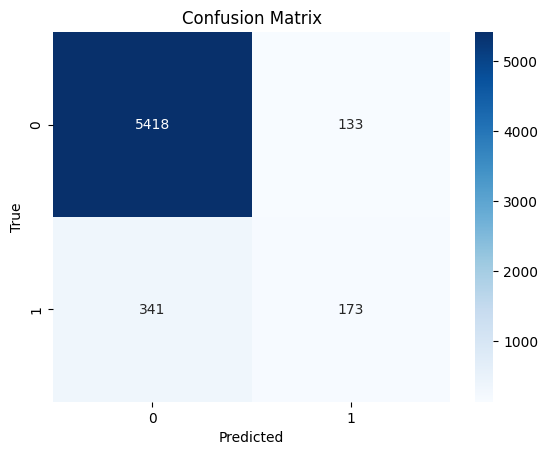

In [ ]:

# Create an instance of the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=3)

# Fit the model to the training data
decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test data
pred_prob = decision_tree.predict_proba(X_test_scaled)[0:10]
prediction = decision_tree.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, prediction)

# Print the accuracy
print("============ Decision Tree ============")
model_result(pred_prob, accuracy)

# Add the model to the list of models
models.append('decision_tree')
model_accuracy.append(accuracy)


**Random Forest**

============ Random Forest ============
First 10 predictions (probabilities): 
      0     1  Class
0  1.00  0.00      0
1  0.86  0.14      0
2  0.96  0.04      0
3  0.94  0.06      0
4  0.97  0.03      0
5  0.96  0.04      0
6  0.98  0.02      0
7  0.94  0.06      0
8  0.26  0.74      1
9  0.90  0.10      0
Prediction Accuracy: 0.9296



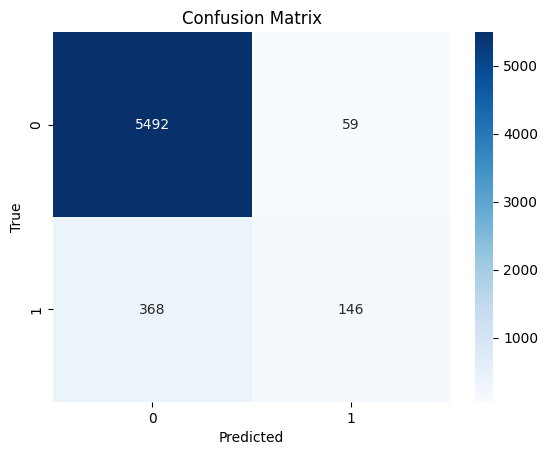

In [ ]:
# Create an instance of the Random Forest Classifier
rf = RandomForestClassifier(random_state=1)

# Fit the model to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the test data
pred_prob = rf.predict_proba(X_test_scaled)[0:10]
prediction = rf.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, prediction)

# Print the accuracy
print("============ Random Forest ============")
model_result(pred_prob, accuracy)

# Add the model to the list of models
models.append('RandomForest')
model_accuracy.append(accuracy)

**Bagging**

============== Bagging ==============
First 10 predictions (probabilities): 
      0     1  Class
0  1.00  0.00      0
1  0.82  0.18      0
2  0.92  0.08      0
3  0.94  0.06      0
4  0.95  0.05      0
5  0.95  0.05      0
6  1.00  0.00      0
7  0.97  0.03      0
8  0.26  0.74      1
9  0.90  0.10      0
Prediction Accuracy: 0.9291



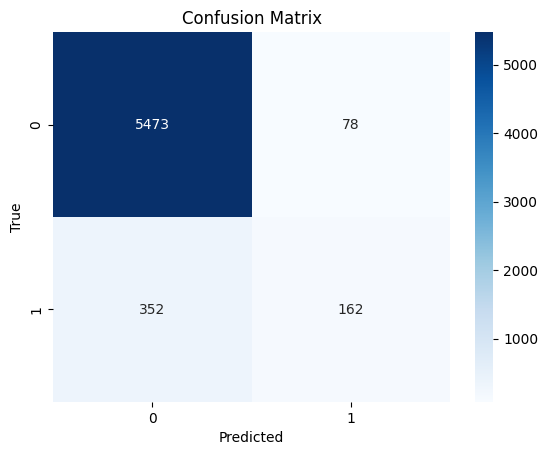

In [ ]:
# Create an instance of the Bagging Classifier
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)

# Fit the model to the training data
bag.fit(X_train_scaled, y_train)

# Make predictions on the test data
pred_prob = bag.predict_proba(X_test_scaled)[0:10]
prediction = bag.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, prediction)

# Print the accuracy
print("============== Bagging ==============")
model_result(pred_prob, accuracy)

# Add the model to the list of models
models.append('Bagging')
model_accuracy.append(accuracy)

**Ada Boosting**

============= Boosting =============
First 10 predictions (probabilities): 
          0         1  Class
0  0.513153  0.486847      0
1  0.505346  0.494654      0
2  0.508366  0.491634      0
3  0.505797  0.494203      0
4  0.509418  0.490582      0
5  0.511623  0.488377      0
6  0.518175  0.481825      0
7  0.507565  0.492435      0
8  0.496990  0.503010      1
9  0.505245  0.494755      0
Prediction Accuracy: 0.9260



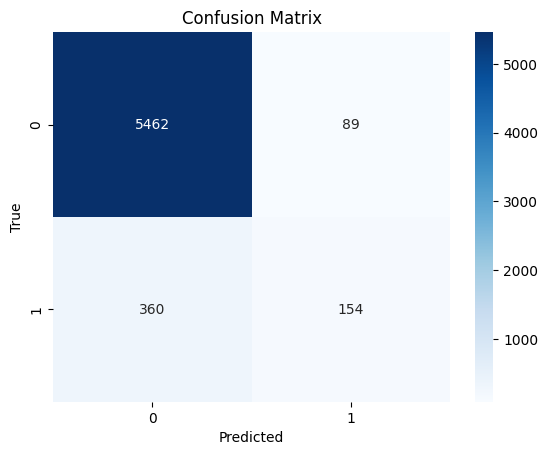

In [ ]:
# Create an instance of the Bagging Classifier
ada = AdaBoostClassifier(n_estimators=100)

# Fit the model to the training data
ada.fit(X_train_scaled, y_train)

# Make predictions on the test data
pred_prob = ada.predict_proba(X_test_scaled)[0:10]
prediction = ada.predict(X_test_scaled)

# Evaluate the accuracy of the model
accuracy = metrics.accuracy_score(y_test, prediction)

# Print the accuracy
print("============= Boosting =============")
model_result(pred_prob, accuracy)

# Add the model to the list of models
models.append('AdaBoost')
model_accuracy.append(accuracy)

In [ ]:
output = pd.concat([pd.Series(models), pd.Series(model_accuracy)], axis=1, keys=['Models', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
output

,Models,Accuracy
5,RandomForest,0.929596
6,Bagging,0.929101
7,AdaBoost,0.925969
1,model2,0.922073
4,decision_tree,0.921847
2,model3,0.920857
3,model4,0.920631
0,model1,0.911459


# Evaluation




In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the parameter grid for hyperparameter optimization
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Create an instance of the Random Forest Classifier
rf = RandomForestClassifier(random_state=1)

# Perform randomized search cross-validation to find the best hyperparameters
random_search = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=10, cv=5, random_state=1)
random_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_rf = random_search.best_estimator_
best_params = random_search.best_params_

# Fit the best model to the training data
best_rf.fit(X_train_scaled, y_train)

# Make predictions on the test data using the best model
best_pred_prob = best_rf.predict_proba(X_test_scaled)[0:10]
best_prediction = best_rf.predict(X_test_scaled)

# Evaluate the accuracy of the best model
best_accuracy = accuracy_score(y_test, best_prediction)
f1_score = metrics.f1_score(y_test, best_prediction)
classification_rep = classification_report(y_test, best_prediction)

# Print the accuracy and best hyperparameters
print("============ Random Forest ============")
print("Best Hyperparameters:", best_params)
print("Accuracy:", best_accuracy)
print("F1 Score:", f1_score)
print("Classification Report:\n", classification_rep)

# Add the best model to the list of models
models.append('RandomForest (Tuned)')
model_accuracy.append(best_accuracy)

# Function to display model result
def model_result(pred_prob, accuracy):
    # Display prediction probabilities and accuracy
    print("Prediction Probabilities:")
    print(pred_prob)
    print("Accuracy:", accuracy)
    print("F1 Score:", f1_score)
    print("Classification Report:\n", classification_rep)



============ Random Forest ============
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Accuracy: 0.928441879637263
F1 Score: 0.39215686274509803
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      5551
           1       0.70      0.27      0.39       514

    accuracy                           0.93      6065
   macro avg       0.82      0.63      0.68      6065
weighted avg       0.92      0.93      0.91      6065



In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from sklearn.utils import class_weight

# Perform resampling on the training data using SMOTE
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Perform undersampling on the resampled data using RandomUnderSampler
rus = RandomUnderSampler(random_state=1)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train_resampled, y_train_resampled)

# Calculate class weights to handle the data imbalance
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)

# Create an instance of the Random Forest Classifier with the best hyperparameters
best_rf = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=None, random_state=1)

# Fit the model to the resampled training data with class weights
best_rf.fit(X_train_resampled, y_train_resampled, sample_weight=class_weights[y_train_resampled])

# Make predictions on the test data using the best model
best_pred_prob = best_rf.predict_proba(X_test_scaled)
best_prediction = best_rf.predict(X_test_scaled)

# Evaluate the accuracy, F1 score, and other metrics of the best model
best_accuracy = metrics.accuracy_score(y_test, best_prediction)
f1_score = metrics.f1_score(y_test, best_prediction)
auc_score = roc_auc_score(y_test, best_pred_prob[:, 1])
classification_rep = classification_report(y_test, best_prediction)

# Print the best hyperparameters, accuracy, F1 score, AUC score, and classification report
print("============ Random Forest ============")
print("Best Hyperparameters:", best_params)
print("Accuracy:", best_accuracy)
print("F1 Score:", f1_score)
print("AUC Score:", auc_score)
print("Classification Report:\n", classification_rep)

============ Random Forest ============
Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Accuracy: 0.9131079967023907
F1 Score: 0.46059365404298874
AUC Score: 0.8827595827021737
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      5551
           1       0.49      0.44      0.46       514

    accuracy                           0.91      6065
   macro avg       0.72      0.70      0.71      6065
weighted avg       0.91      0.91      0.91      6065

